In [76]:
import numpy as np

p1 = .2
p2 = .1
n = 100

n_trials = 10000
for i in range(n_trials):
    bugs1 = np.random.random(n)
    bugs2 = np.random.random(n)

    k1 += sum(bugs1 < p1)
    k2 += sum(bugs2 < p2)
    c += sum((bugs1 < p1) & (bugs2 < p2))
    
k1 /= n_trials
k2 /= n_trials
c /= n_trials

print(k1, k2, c)

20.0193082687 10.0245980395 2.0231016694


In [112]:
from thinkbayes2 import Pmf, Cdf, Suite, Joint
from scipy.stats import binom

class foo(Suite, Joint):
    def Likelihood(self, data, hypo):
        k1, k2, c = data
        n, p1, p2 = hypo
        
        like1 = binom.pmf(k1, n, p1)
        like2 = binom.pmf(k2, n, p2) * binom.pmf(c, n, c/n)
        
        return like1 * like2

In [116]:
from itertools import permutations, product
from operator import itemgetter

hypos = list(product(linspace(10, 300, 20), linspace(0, 1, 20), linspace(0, 1, 20)))

pmf = foo(hypos)
pmf.Update((20, 15, 3))

max(pmf.Items(), key=itemgetter(1))

((25.263157894736842, 0.78947368421052633, 0.57894736842105265),
 0.027367542148603881)

In [25]:
from scipy.stats import poisson

p = poisson(2.8)
print(p.mean())
print(p.cdf(3))
print(p.pmf(3))

2.8
0.691937432591
0.222483749125


In [44]:
from math import factorial
print(factorial(10)/(factorial(3)*factorial(7)))
.3*(factorial(10)/(factorial(3)*factorial(7))) + .7*(factorial(10)/(factorial(3)*factorial(7)))

120.0


120.0

woo


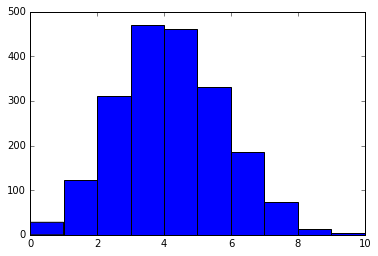

Counter({3: 471, 4: 461, 5: 332, 2: 311, 6: 186, 1: 122, 7: 73, 0: 28, 8: 12, 9: 3, 10: 1})


In [60]:
from random import random
import matplotlib.pyplot as plt

ks = []
for i in range(2000):
    if (random() < .3):
        acc = .3
    else:
        acc = .4

    k = 0
    for j in range(10):
        if (random() <= acc):
            k += 1
    ks.append(k)
    if (k == 10):
        print("woo")
    
plt.hist(ks, bins=10)
plt.show()

from collections import Counter
c = Counter(ks)
print(c)

In [31]:
from scipy.stats import binom

.3 * binom(10, .3).pmf(3) + .7 * binom(10, .4).pmf(3)

0.23054197320000014

In [34]:
binom(2, .5).pmf(2)

0.25

In [40]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [2]:
def EvalWeibullPdf(x, lam, k):
    """Computes the Weibull PDF.

    x: value
    lam: parameter lambda in events per unit time
    k: parameter

    returns: float probability density
    """
    arg = (x / lam)
    return k / lam * arg**(k-1) * np.exp(-arg**k)

def EvalWeibullCdf(x, lam, k):
    """Evaluates CDF of the Weibull distribution."""
    arg = (x / lam)
    return 1 - np.exp(-arg**k)

def MakeWeibullPmf(lam, k, high, n=200):
    """Makes a PMF discrete approx to a Weibull distribution.

    lam: parameter lambda in events per unit time
    k: parameter
    high: upper bound
    n: number of values in the Pmf

    returns: normalized Pmf
    """
    xs = np.linspace(0, high, n)
    ps = EvalWeibullPdf(xs, lam, k)
    return Pmf(dict(zip(xs, ps)))

0.710553653692


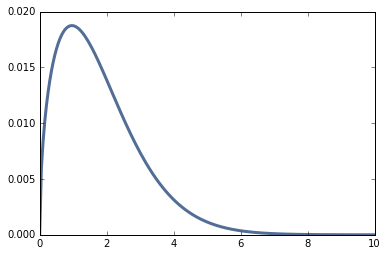

In [12]:
import numpy as np
import thinkplot
from thinkbayes2 import Pmf
% matplotlib inline
p = MakeWeibullPmf(2, 1.5, 10)
thinkplot.plot(p)
print(p.ProbGreater(1))